In [199]:
%pip install gurobipy
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [200]:
rnd = np.random
rnd.seed(51)

In [201]:
n = 5  # number of clients
f = 2  # number of charging stations
b = 2 #number of battery swapping stations
num_points = n + f + b
num_of_copies = 2

In [202]:
# Generate random coordinates for xc and yc
xc = np.random.rand(num_points) * 200
yc = np.random.rand(num_points) * 100

sum_xc=0
sum_yc=0
for i in xc:
    sum_xc+=i
for i in yc:
    sum_yc+=i
sum_xc/=num_points
sum_yc/=num_points

xc = np.insert(xc, 0, sum_xc)
yc = np.insert(yc, 0, sum_yc)

# Randomly select f points from the generated points
selected_indices = np.random.choice(np.setdiff1d(np.arange(1, num_points), 0), f+b, replace=False)
selected_xc = xc[selected_indices]
selected_yc = yc[selected_indices]

# Remove the selected points from xc and yc
xc = np.delete(xc, selected_indices)
yc = np.delete(yc, selected_indices)
xc=np.append(xc,xc[0])
yc=np.append(yc,yc[0])

selected_indices_f = np.random.choice(f+b, f, replace=False)
selected_xc_f = selected_xc[selected_indices_f]
selected_yc_f = selected_yc[selected_indices_f]

selected_xc = np.delete(selected_xc, selected_indices_f)
selected_yc = np.delete(selected_yc, selected_indices_f)
print(xc)
print(selected_xc_f)
print(selected_xc)
b_x_coordinates=selected_xc;
b_y_coordinates=selected_yc;

num_of_copies = 2
# Append copies of each selected point after the first n points

for i in range(f):
    for _ in range(num_of_copies):
        xc = np.append(xc, selected_xc_f[i])
        yc = np.append(yc, selected_yc_f[i])

for i in range(b):
    for _ in range(num_of_copies):
        xc = np.append(xc, b_x_coordinates[i])
        yc = np.append(yc, b_y_coordinates[i])

[65.53728031, 54.44603955, 88.12234968, 102.51692288, 31.34438071, 105.3051593, 65.53728031, 124.89947439, 124.89947439, 13.08142115, 13.08142115, 64.58673463, 64.58673463, 5.53304047, 5.53304047]
[49.32313992, 97.1122129, 54.21251519, 77.75853955, 6.09951352, 26.31270804, 49.32313992, 43.02173031, 43.02173031, 54.31221068, 54.31221068, 83.76162527, 83.76162527, 1.3172038, 1.3172038]


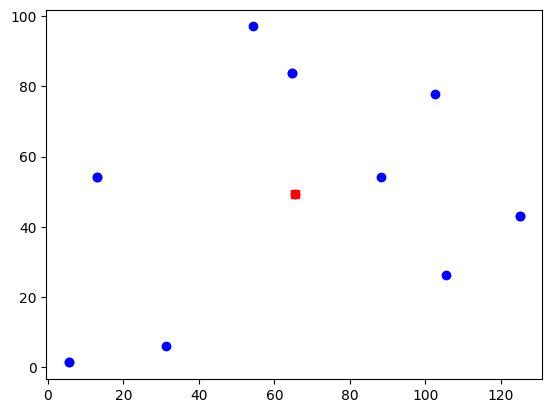

In [204]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [205]:
I = [i for i in range(1, n+1)] #Number of nodes/locations
F = [i for i in range(n+2,n+1+num_of_copies*f+1)]
B = [i for i in range(n+1+num_of_copies*f+1,n+1+num_of_copies*f+num_of_copies*b+1)]
F_comb = F + B
N = I + F + B
F_depo = [0] + F + B
I_depo = [0] + N
I_dest = N + [n+1]
I_depo_dest = N + [0] + [n+1]
num_of_vehicles = 5
K = [i for i in range(1,num_of_vehicles+1)]
A = [(i, j, k) for i in I_depo for j in I_dest for k in K if i != j] 
dist = [(i, j) for i in I_depo for j in I_dest if i != j] 
total_with_vehicles = [(i,k) for i in I_depo_dest for k in K]
variable_charge = [(i,k) for i in F for k in K]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in dist} 
lb = 10
ub = 14
C = {k: rnd.randint(lb, ub) for k in K}
max_dist_limit = {k: rnd.randint(lb*15,ub*20) for k in K}

S = 0.002  
thresholds = [50, 100, 150, 200]
multipliers = [1.0, 1.19, 1.29, 1.39, 1.49]
ranges=4
t_base = {}

for i, j, k in A:
    avg_value = c[i,j]
    if(c[i,j]<thresholds[0]):
        for k in K:
                t_base[i, j, k] = C[k] *S* multipliers[0]*c[i,j]
    elif(c[i,j]<=200):
         for x in range(0,ranges-1):
              if(c[i,j]>=thresholds[x] and c[i,j]<=thresholds[x+1]):
                           for k in K:
                               t_base[i, j, k] = C[k] *S* multipliers[x+1]*c[i,j]
    else:
         for k in K:
                t_base[i, j, k] = C[k] *S* multipliers[ranges-1]*c[i,j]

q = {i: rnd.randint(1, 10) for i in N}
Q = 500
H = 50 
max_value = max(c.values())
Q = H*1.1*max_value
q[0]=0

#Includes different charging times:
# 0-30 at a rate of 3500/hour
# 30-50 at a rate of 300/hour
# 50-80 at a rate of 250/hour
# 80-100 at a rate of 200/hour

Q=10000
full_charging_time = Q*(0.3/350 + 0.2/300 + 0.2/250 + 0.2/200)/2
for i in range(n+1,n+2+num_of_copies*(f+b)):
    q[i] = 0
max_time_limit = 200
battery_swapping_time = 2

[1, 2, 3, 4, 5]
[7, 8, 9, 10]
[1, 2, 3, 4, 5]
[7, 8, 9, 10]
[11, 12, 13, 14]
[(0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (0, 7, 1), (0, 7, 2), (0, 7, 3), (0, 7, 4), (0, 7, 5), (0, 8, 1), (0, 8, 2), (0, 8, 3), (0, 8, 4), (0, 8, 5), (0, 9, 1), (0, 9, 2), (0, 9, 3), (0, 9, 4), (0, 9, 5), (0, 10, 1), (0, 10, 2), (0, 10, 3), (0, 10, 4), (0, 10, 5), (0, 11, 1), (0, 11, 2), (0, 11, 3), (0, 11, 4), (0, 11, 5), (0, 12, 1), (0, 12, 2), (0, 12, 3), (0, 12, 4), (0, 12, 5), (0, 13, 1), (0, 13, 2), (0, 13, 3), (0, 13, 4), (0, 13, 5), (0, 14, 1), (0, 14, 2), (0, 14, 3), (0, 14, 4), (0, 14, 5), (0, 6, 1), (0, 6, 2), (0, 6, 3), (0, 6, 4), (0, 6, 5), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 1), (1, 3, 2), (1, 3, 3), (1, 3, 4), (1, 3, 5), (1, 4, 1), (1, 4,

In [214]:
from gurobipy import Model, GRB, quicksum

model = Model('ECVRP')
x = model.addVars(A, vtype=GRB.BINARY, name='x')
u = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0.0, name='u')
y = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0.0, ub=Q, name='y')
h = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS, name='h')
t = model.addVars(A,vtype=GRB.CONTINUOUS, lb=0.0, name='t')
P = model.addVars(variable_charge, vtype = GRB.CONTINUOUS, lb=0, ub=Q, name = 'charge level')
T = model.addVars(variable_charge, vtype = GRB.CONTINUOUS, lb=0.0, name = 'charging time')

for i,k in u.keys():
    u[i,k].ub = C[k]
    u[i,k].lb = 0

Tf = 10 
Cost = 2000
Fac = 0.1
model.modelSense = GRB.MINIMIZE
model.setObjective(quicksum(x[i, j, k]*(t[i,j,k]) for i, j, k in A) +  quicksum(x[i,j,k]*(battery_swapping_time) for i in I_depo for j in B if i!=j for k in K) + quicksum(x[0,j,k]*Cost/Tf for j in N for k in K) + quicksum(x[i,j,k]*T[j,k] for i in I_depo for j in F if i!=j for k in K))
model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) == 1 for i in I), name='outgoing')
model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) <= 1 for i in F_comb), name='charging_outgoing')
model.addConstrs((quicksum(x[0, j, k] for j in N) <= 1 for k in K), name='charging_outgoing')
model.addConstrs((quicksum(x[i, j, k] for i in I_depo if i!=j)-quicksum(x[j,i,k] for i in I_dest if i!=j) == 0 for j in N for k in K), name='blockage')
model.addConstrs((u[j,k]<=u[i,k]-q[i]*x[i,j,k]+ C[k]*(1-x[i,j,k]) for i in I_depo for j in I_dest if i!=j for k in K), name='weight_transfer')
model.addConstrs(quicksum(x[i,j,k]*c[i,j] for i in I_depo for j in I_dest if i!=j)<=max_dist_limit[k] for k in K)
model.addConstrs((quicksum(x[i,j,k]*t[i,j,k] for i in I_depo for j in I_dest if i!=j) + quicksum(x[i,j,k]*(T[j,k]) for i in I_depo for j in F if i!=j)+quicksum(x[i,j,k]*(battery_swapping_time) for i in I_depo for j in B if i!=j))<=max_time_limit for k in K)

for i in F:
    for k in K:
       model.addGenConstrPWL(P[i,k], T[i,k], [0.5*Q, 0.8*Q, Q], [0.5*Q*0.2, 0.8*Q*0.5, 0.8*Q])

Temp = 323
theta = 0.1
H = H*0.8 + Temp*(theta)
model.addConstrs(h[i,k] == H + u[i,k] / C[k] for i in I_depo_dest for k in K)
model.addConstrs((y[j,k]<=P[i,k]-h[i,k]*c[i,j]*x[i,j,k] + Q*(1-x[i,j,k]) for i in F for j in I_dest  if i!=j for k in K), name='after leaving from charging station')
model.addConstrs(t[i,j,k] == t_base[i,j,k]*u[i,k] for i in I_depo for j in I_dest if i!=j for k in K)
model.addConstrs((y[j,k]<=y[i,k]-h[i,k]*c[i,j]*x[i,j,k]+Q*(1-x[i,j,k]) for i in I for j in  I_dest  if i!=j for k in K), name = 'charge_left')
model.addConstrs((P[i,k]>=y[i,k] for i in F for k in K), name='charge_lower_bound')
model.addConstrs((P[i,k]<=Q for i in F for k in K), name='charge_upper_bound')
model.addConstrs((y[0,k]==Q for k in K), name='Specifying_constant_charge')
model.Params.MIPGap = 0.1
model.Params.TimeLimit = 700 # seconds
model.optimize()

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 700
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2043 rows, 2095 columns and 8220 nonzeros
Model fingerprint: 0x6897a57b
Model has 1175 quadratic objective terms
Model has 590 quadratic constraints
Model has 20 general constraints
Variable types: 1180 continuous, 915 integer (915 binary)
Coefficient statistics:
  Matrix range     [8e-02, 1e+02]
  QMatrix range    [1e+00, 1e+02]
  QLMatrix range   [1e+00, 1e+04]
  Objective range  [2e+00, 2e+02]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+04]
  RHS range        [1e+00, 1e+04]
  QRHS range       [2e+02, 1e+04]
  PWLCon x range   [8e+03, 8e+03]
  PWLCon y range   [4e+03, 4e+03]
Presolve removed 437 rows and 357 columns
Presolve time: 0.16s
Presolved: 3460 rows

In [207]:
# for var_name in u:
#     u_var = u[var_name]
#     print(f"{var_name} = {u_var.X}")

In [208]:
# for var_name in h:
#     h_var = h[var_name]
#     print(f"{var_name} = {h_var.X}")

In [209]:
for var_name in y:
    y_var = y[var_name]
    print(f"{var_name} = {y_var.X}")

(1, 1) = 0.0
(1, 2) = 10000.0
(1, 3) = -0.0
(1, 4) = 10000.0
(1, 5) = 4795.125100450784
(2, 1) = 0.0
(2, 2) = 0.0
(2, 3) = 10000.0
(2, 4) = 10000.0
(2, 5) = 0.0
(3, 1) = 3419.3219800569464
(3, 2) = 10000.0
(3, 3) = 10000.0
(3, 4) = 3391.332987041472
(3, 5) = 0.0
(4, 1) = 1913.2336883776504
(4, 2) = 7372.320597898862
(4, 3) = 7117.443548926226
(4, 4) = 1924.1714524319473
(4, 5) = 0.0
(5, 1) = 10000.0
(5, 2) = 0.0
(5, 3) = 7601.189113323632
(5, 4) = 7598.210334127458
(5, 5) = 0.0
(7, 1) = 0.0
(7, 2) = 0.0
(7, 3) = 0.0
(7, 4) = 0.0
(7, 5) = 0.0
(8, 1) = 0.0
(8, 2) = 0.0
(8, 3) = 0.0
(8, 4) = 0.0
(8, 5) = 0.0
(9, 1) = 0.0
(9, 2) = 0.0
(9, 3) = 0.0
(9, 4) = 0.0
(9, 5) = 0.0
(10, 1) = 0.0
(10, 2) = 0.0
(10, 3) = 0.0
(10, 4) = 0.0
(10, 5) = 0.0
(11, 1) = 0.0
(11, 2) = 0.0
(11, 3) = 0.0
(11, 4) = 0.0
(11, 5) = 0.0
(12, 1) = 0.0
(12, 2) = 0.0
(12, 3) = 0.0
(12, 4) = 0.0
(12, 5) = 0.0
(13, 1) = 0.0
(13, 2) = 0.0
(13, 3) = 0.0
(13, 4) = 0.0
(13, 5) = 0.0
(14, 1) = 0.0
(14, 2) = 0.0
(14, 3) = 0.0


In [210]:
for var_name in P:
    time_var = P[var_name]
    print(var_name)
    print(f"{var_name} = {time_var.X}")

(7, 1)
(7, 1) = 5600.000000000004
(7, 2)
(7, 2) = 4000.0
(7, 3)
(7, 3) = 8000.0
(7, 4)
(7, 4) = 4000.0
(7, 5)
(7, 5) = 8000.0
(8, 1)
(8, 1) = 8000.0
(8, 2)
(8, 2) = 8000.0
(8, 3)
(8, 3) = 4000.0
(8, 4)
(8, 4) = 4000.0
(8, 5)
(8, 5) = 4049.3913351340484
(9, 1)
(9, 1) = 4000.0
(9, 2)
(9, 2) = 4000.0
(9, 3)
(9, 3) = 4000.0
(9, 4)
(9, 4) = 4000.0
(9, 5)
(9, 5) = 8000.0
(10, 1)
(10, 1) = 4000.0
(10, 2)
(10, 2) = 4000.0
(10, 3)
(10, 3) = 4000.0
(10, 4)
(10, 4) = 4000.0000000000005
(10, 5)
(10, 5) = 8000.0


In [211]:
# print(active_arcs)
# for a in active_arcs:
#     print(time[a].X, "aman")
# for a in active_arcs:
#     print(c[a[0],a[1]])
# # print(active_arcs)
# plt.scatter(xc[1:n], yc[1:n], c = 'b')
# plt.scatter(xc[n+2:],yc[n+2:], c= 'black')
# plt.scatter(xc[0], yc[0], c='r')

# # plt.title('Optimal route with %s as max weight'%C, fontsize = 20)
# for i in I_depo_dest:
#     plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
#     # plt.annotate('$q_%d = %d$' % (i,y[i]), (xc[i]-5, yc[i]+5))
# # number_of_vehicles=0
# # for i,j,k in active_arcs:
# #     if(i==0):
# #        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'g')
# plt.show()
# # print(number_of_vehicles)

In [212]:
active_arcs = [a for a in A if x[a].x > 0.99]

values = {}
vehicle_dist={}
vehicle_time={}
for i,j,k in active_arcs:
    if(k not in vehicle_dist):
      vehicle_dist[k] = c[i,j]
      vehicle_time[k] = t[i,j,k].X
    else:
         vehicle_dist[k]+=c[i,j]
         vehicle_time[k]+=t[i,j,k].X

    if i!=0:
        values[i]=(j,k)
        
colors = ['magenta', 'green', 'red', 'yellow', 'cyan']
def rec(i, j,k,col):
        print(i,j,k)
        mid_x = (xc[i] + xc[j]) / 2
        mid_y = (yc[i] + yc[j]) / 2
        plt.arrow(xc[i], yc[i], mid_x - xc[i], mid_y - yc[i],
                  head_width=2, head_length=2, fc='red', ec='red')   
        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = colors[col])
        if(j==n+1):
             return
        rec(j,values[j][0],values[j][1],col)


54.44603955
88.12234968
102.51692288
31.34438071
105.3051593
0 1 4
1 12 4
12 3 4
3 6 4
0 2 3
2 5 3
5 6 3
0 4 2
4 13 2
13 9 2
9 6 2


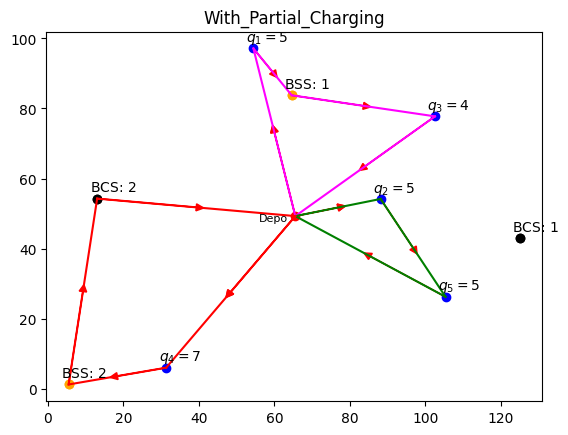

In [213]:
active_arcs = [a for a in A if x[a].x > 0.99]

# print(active_arcs)
plt.scatter(xc[1:n+1], yc[1:n+1], c = 'blue')
plt.scatter(xc[n+2:n+2+f*num_of_copies],yc[n+2:n+2+f*num_of_copies], c= 'black')
plt.scatter(xc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies],yc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies], c= 'orange')
plt.scatter(xc[0], yc[0], c='r')
plt.text(xc[0]-2, yc[0]-2, 'Depo', fontsize=8, color='black', ha='right', va='bottom')

visited = []
for i in I:
    print(xc[i])
    if(xc[i] not in visited):
      plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-2, yc[i]+2))
      visited.append(xc[i])

count=1
for i in F:
    if(xc[i] not in visited):
      plt.annotate('BCS: $%d$' % count, (xc[i]-2, yc[i]+2))
      count+=1
      visited.append(xc[i])

count=1
for i in B:
    if(xc[i] not in visited):
      plt.annotate('BSS: $%d$' % count, (xc[i]-2, yc[i]+2))
      count+=1
      visited.append(xc[i])

col=0
for i,j,k in active_arcs:
    if(i==0):
        mid_x = (xc[i] + xc[j]) / 2
        mid_y = (yc[i] + yc[j]) / 2
        plt.arrow(xc[i], yc[i], mid_x - xc[i], mid_y - yc[i],
                  head_width=2, head_length=2, fc='red', ec='red')        
        rec(i,j,k,col)
        col+=1

plt.title('With_Partial_Charging')

plt.show()
